In [1]:
import pandas as pd

# Load data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

def preprocess_data(data):
    # Fill missing values for 'Age' and 'Fare' with median
    imputer = SimpleImputer(strategy='median')
    data['Age'] = imputer.fit_transform(data[['Age']])
    data['Fare'] = imputer.fit_transform(data[['Fare']])
    
    # Encode categorical data: 'Sex' and 'Embarked'
    encoder = LabelEncoder()
    data['Sex'] = encoder.fit_transform(data['Sex'])
    data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
    data['Embarked'] = encoder.fit_transform(data['Embarked'])
    
    # Selecting features for the model
    features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
    if 'Survived' in data.columns:
        return data[features], data['Survived']
    return data[features]

X_train, y_train = preprocess_data(train_data)
X_test = preprocess_data(test_data)

In [3]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
888,3,0,28.0,1,2,23.4500,2
889,1,1,26.0,0,0,30.0000,0


In [4]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Logistic Regression
logreg = LogisticRegression(max_iter=200)

# Support Vector Machine
svm = SVC()

# k-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Decision Tree
decision_tree = DecisionTreeClassifier()

In [22]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Prepare a Stratified K-Fold to maintain ratio of classes in each fold
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Initialize models
models = [
    (random_forest, 'Random Forest'), 
    (logreg, 'Logistic Regression'), 
    (svm, 'SVM'), 
    (knn, 'KNN'), 
    (decision_tree, 'Decision Tree')
]

metrics = [accuracy_score, precision_score, recall_score, f1_score]

# Function to evaluate each model on each metric
def evaluate_models_by_metric(models, X, y, metrics):
    results = {metric.__name__: [] for metric in metrics}
    
    # Evaluate each model
    for model, name in models:
        model_results = {'Model': name}
        for metric in metrics:
            score = cross_val_score(model, X, y, cv=skf, scoring=make_scorer(metric))
            model_results[metric.__name__] = score.mean()
        for metric_name in results:
            results[metric_name].append(model_results)
    
    # Print results by metric
    for metric_name, data in results.items():
        print(f"\n--- {metric_name.upper()} ---")
        for result in data:
            print(f"{result['Model']} Average {metric_name}: {result[metric_name]:.5f}")

# Evaluate and print the results
evaluate_models_by_metric(models, X_train, y_train, metrics)


--- ACCURACY_SCORE ---
Random Forest Average accuracy_score: 0.81928
Logistic Regression Average accuracy_score: 0.79352
SVM Average accuracy_score: 0.67787
KNN Average accuracy_score: 0.70927
Decision Tree Average accuracy_score: 0.78563

--- PRECISION_SCORE ---
Random Forest Average precision_score: 0.77496
Logistic Regression Average precision_score: 0.74442
SVM Average precision_score: 0.68438
KNN Average precision_score: 0.63022
Decision Tree Average precision_score: 0.72151

--- RECALL_SCORE ---
Random Forest Average recall_score: 0.74855
Logistic Regression Average recall_score: 0.70742
SVM Average recall_score: 0.30115
KNN Average recall_score: 0.58768
Decision Tree Average recall_score: 0.73981

--- F1_SCORE ---
Random Forest Average f1_score: 0.76083
Logistic Regression Average f1_score: 0.72435
SVM Average f1_score: 0.41718
KNN Average f1_score: 0.60766
Decision Tree Average f1_score: 0.73130


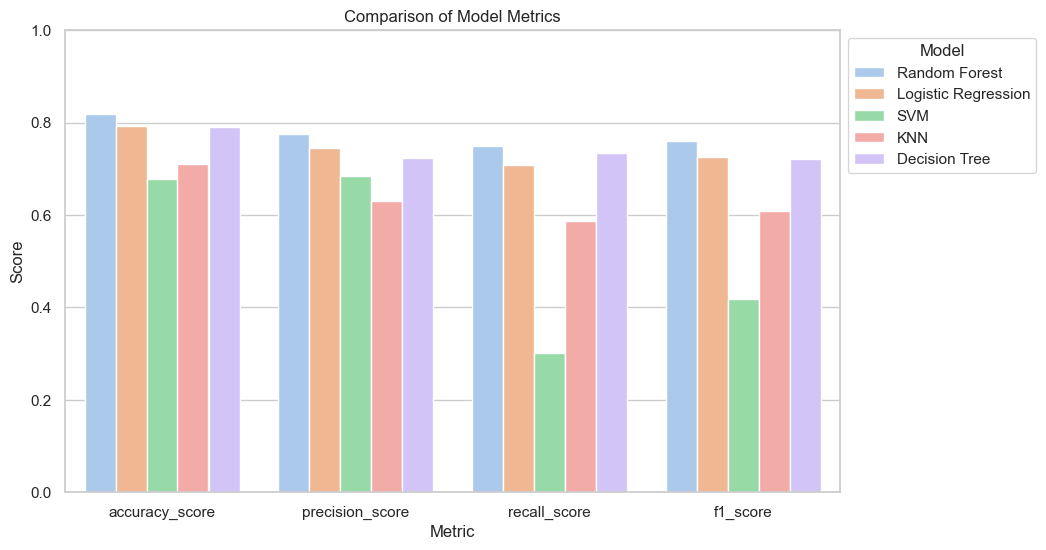

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_models_by_metric_df(models, X, y, metrics):
    results = []
    for model, name in models:
        for metric in metrics:
            score = cross_val_score(model, X, y, cv=skf, scoring=make_scorer(metric))
            results.append({'Model': name, 'Metric': metric.__name__, 'Score': score.mean()})
    return pd.DataFrame(results)

results_df = evaluate_models_by_metric_df(models, X_train, y_train, metrics)

# Set the aesthetic style of the plots
sns.set_theme(style="whitegrid", palette="pastel")

# Create a bar plot
plt.figure(figsize=(10, 6))
plot = sns.barplot(x="Metric", y="Score", hue="Model", data=results_df)
plot.set_title('Comparison of Model Metrics')
plot.set_ylim(0, 1)
plt.legend(title='Model', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()
